# Описание задачи

Дан датасет представляющий из себя 18 тысяч описаний вакансий, из которых около 800 - поддельные.Данные состоят из текстовой информации и метаинформации о вакансиях.

По вакансии с 17 признаками необходимо опредить, к какому классу принадлежит вакансия: настоящая либо фальшивая.


# Чтение данных

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

# Визуализирование данных и вычисление основных характеристик (среднее, разброс, корреляционную матрицу и т.д.). Интерпретация.

In [23]:
df = pd.read_csv("fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [24]:
df.shape

(17880, 18)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

Признаки:
1. job_id - уникальный идентификатор вакансии

2. title - Заголовок объявления о вакансии.

3. location - Географическое расположение вакансии.

4. department - Корпоративный отдел (например, продажи).

5. salary_range - Ориентировочный диапазон заработной платы (например, от 50 000 до 60 000 долларов США).

6. company_profile - Краткое описание компании.

7. description - Подробное описание вакансии.

8. requirements - требования к сотруднику.

9. benefits - льготы от работодателя.

10. telecommuting - удаленная работа (true - да, false - нет).

11. has_company_logo - Наличие логотипа компании (true - да, false - нет).

12. has_questions - Проверочные вопросы при устройстве (true - да, false - нет).

13. employment_type - Полный, Неполный рабочий день, Контракт и т. д.

14. required_experience - Исполнительный, Начальный уровень, Стажер и т. д.

15. required_education - Докторантура, степень магистра, бакалавр и т. д.

16. industry - Автомобильная промышленность, информационные технологии, здравоохранение, недвижимость и т. д.

17. functions - Консультации, инжиниринг, исследования, продажи и т. д.

18. fraudulent - атрибут классификации (0 - оригинальная вакансия, 1 - фальшивая вакансия)

In [26]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


# Обработка пропущенных значений

In [27]:
df=df.drop(['job_id','department','salary_range','description',
            'title','company_profile','benefits','requirements'],axis=1)


In [28]:
df.isnull().sum()

location                346
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

Из-за обилия нулевых значений в некоторых категориальных признаках, удалить строки или столбцы нельзя. Поэтому лучше заполнить их пустыми значениями.


In [29]:
df.fillna(" ",inplace = True)
df.isnull().sum()

location               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

#  Обработка категориальных признаков

In [30]:
df['location'] = df['location'].astype('category')
df['employment_type'] = df['employment_type'].astype('category')
df['required_experience'] = df['required_experience'].astype('category')
df['required_education'] = df['required_education'].astype('category')
df['industry'] = df['industry'].astype('category')
df['function'] = df['function'].astype('category')
df.describe(include=["category"])

,location,employment_type,required_experience,required_education,industry,function
count,17880,17880,17880,17880,17880,17880
unique,3106,6,8,14,132,38
top,"GB, LND, London",Full-time,,,,
freq,718,11620,7050,8105,4903,6455


In [31]:
df

,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,"US, NY, New York",0,1,0,Other,Internship,,,Marketing,0
1,"NZ, , Auckland",0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,"US, IA, Wever",0,1,0,,,,,,0
3,"US, DC, Washington",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,"US, FL, Fort Worth",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...
17875,"CA, ON, Toronto",0,1,1,Full-time,Mid-Senior level,,Computer Software,Sales,0
17876,"US, PA, Philadelphia",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,"US, TX, Houston",0,0,0,Full-time,,,,,0
17878,"NG, LA, Lagos",0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


Теперь для дальнейших вычислений переведем категориальные признаки в численные.

In [32]:
categorical=df.select_dtypes('category').columns.tolist()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical:
    df[i]=le.fit_transform(df[i])
df

,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,2536,0,1,0,3,5,0,0,23,0
1,1074,0,1,0,2,7,0,76,8,0
2,1868,0,1,0,0,0,0,0,0,0
3,1704,0,1,0,2,6,2,23,32,0
4,1742,0,1,1,2,6,2,52,17,0
...,...,...,...,...,...,...,...,...,...,...
17875,167,0,1,1,2,6,0,23,32,0
17876,2735,0,1,1,2,6,2,62,1,0
17877,2876,0,0,0,2,0,0,0,0,0
17878,1046,0,0,1,1,7,7,49,10,0



# Проведение нормализации


Для текущего набора признаков нормализация не требуется(можно счить их уже нормализованными).




# Разбиение данных на обучающую и тестовую выборки

Разобъем данные на обучающую и тестовую выборку в пропорции 60:40

In [33]:
x=df.drop(['fraudulent'],axis=1)
y=df['fraudulent']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=1,test_size=0.4)
N_trane, _ = x_train.shape
N_test, _ = x_test.shape
N_trane, N_test

(10728, 7152)

# Запуск классификатора ближайших соседей

Для предсказания истинности вакансии воспользуемся методом k ближайших соседей.

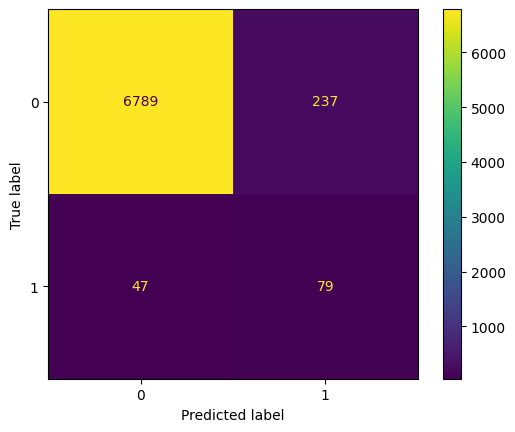

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
disp=ConfusionMatrixDisplay(confusion_matrix(y_test_pred, y_test))
disp.plot()

Для повышения точности модели имеет смысл рассмотреть иное количество k(количество соседей) в моделе.


# Вычисление ошибки на обучающей и тестовой выборках. Выбор оптимального значения гиперпараметра (к-ва ближайших соседей)

In [35]:
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print('k = {}, accuracy = {}'.format(k, accuracy_score(y_pred, y_test)))

k = 1, accuracy = 0.9569351230425056
k = 2, accuracy = 0.9623881431767338
k = 3, accuracy = 0.9595917225950783
k = 4, accuracy = 0.9616890380313199
k = 5, accuracy = 0.9602908277404921
k = 6, accuracy = 0.9609899328859061
k = 7, accuracy = 0.9601510067114094
k = 8, accuracy = 0.9615492170022372
k = 9, accuracy = 0.960430648769575
k = 10, accuracy = 0.9621085011185683
k = 11, accuracy = 0.9619686800894854
k = 12, accuracy = 0.9609899328859061
k = 13, accuracy = 0.9602908277404921
k = 14, accuracy = 0.9601510067114094
k = 15, accuracy = 0.9601510067114094
k = 16, accuracy = 0.959731543624161
k = 17, accuracy = 0.9593120805369127
k = 18, accuracy = 0.95917225950783
k = 19, accuracy = 0.95917225950783


Наилучшая точность достигается при k=2:

In [36]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)

y_test_predict = knn.predict(x_test)
y_train_pred = knn.predict(x_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != y_train_pred)

print("err_train: ", err_train)
print("err_test: ", err_test)

print("acc_train: ", 1-err_train)
print("acc_test: ",  1-err_test)

err_train:  0.026938851603281133
err_test:  0.03761185682326622
acc_train:  0.9730611483967189
acc_test:  0.9623881431767338


Ошибка на тренировочной выборке при этом составила 2,7%, а на тестовой - 3,7%.

# Коррелированные переменные


<Axes: >

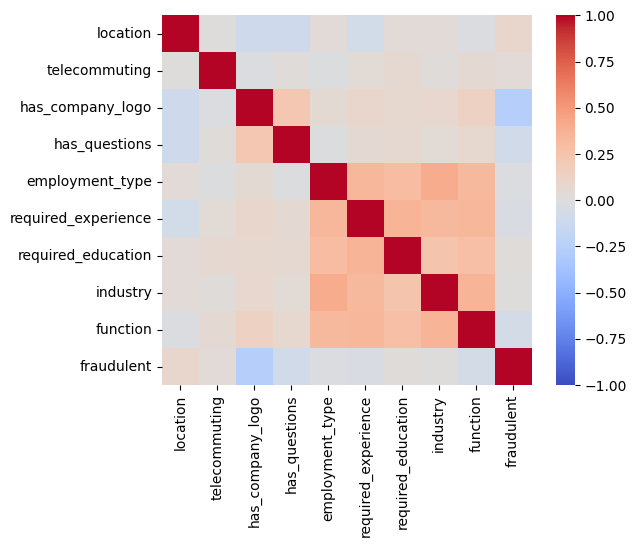

In [37]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix , square=True, vmin = -1, vmax = 1,cmap="coolwarm")

Строгой или значимой корреляции нет.

# Результат

Для данного датасета и метода k наименьших соседей, наиболее эфективные результаты получились при выборе k=2. Достигаемая ошибка на тренировочной выборке при этом составила 2,7%, а на тестовой - 3,7%.